# Решение уравнение Коши

### Описание задачи

Дано дифференциальное уравнение вида:
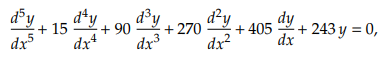

Определены начальные условия:
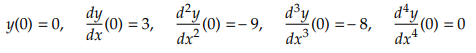

Необходимо написать программу численного решения данного уравнения на участке [0;5]

### Подход к решению

Для решения данной задачи была выбрана прямая численная схема. Эта схема была выбрана более приоритетной, так как она является достаточно простой в исполнении для решения подобных обыкновенных дифференциальный уравнений, нетребовательна к памяти (в отличии от схем Рунге-Кутты), а также явно выражает следующее значение функции на основе предыдущих значений, что повышает точность и стабильность (в отличии от метода Эйлера). Это означает, что значения на следующем шаге могут быть вычислены независимо от предыдущих значений, что упрощает распараллеливание вычислений. Однако данная схема очень чувствительна к длине шага итерации, поэтому его подбор должен быть достаточно "деликатным". Для решения такой относительно простой с технической точки зрения задачи оправданным будет взять шаг 0.01-0.001.

### Процесс решения

#### Методология решения (единая программная функция- после)

Перед началом непосредственного применения схемы для упрощения процесса кодирования все переменные dy/dx  заменим на dy (для степенных- d5y, d4y, d3y, d2y) и получим следующее уравнение вида:

d5y + 15 * d4y + 90 * d3y + 270 * d2y + 405 * d4y + 243 * y = 0


После этого найдем правую часть уравнения. Эта часть будет иметь вид:

-15 * d4y - 90 * d3y - 270 * d2y - 405 * dy - 243 * y

Далее импортируем необходимые для работы библиотеки и зададим правую часть (уравнение выше) как отдельную функцию f для решения:

In [1]:
import numpy as np # для работы с матрицами и массивами
import matplotlib.pyplot as plt # для работы с визуализациями

In [2]:
def f(y, dy, d2y, d3y, d4y):
    """Функция, решающая правую часть дифференциального уравнения"""
    function = -15 * d4y - 90 * d3y - 270 * d2y - 405 * dy - 243 * y
    
    return function

Определим начальные условия и некоторые другие необходимые параметры решения

In [3]:
# определим начальные условия для решения, данные в условии задачи
x0 = 0
y0 = 0
dy0 = 3
d2y0 = -9
d3y0 = -8
d4y0 = 0

# определим величину шага итерации
h = 0.001

# определим количество шагов на заданном интервале [0;5]
x_start = 0
x_end = 5
num_steps = int((x_end - x_start) / h) + 1

Создадим одномерные массивы для каждой переменной уравнения функции f, куда будем сохранять значения при обработке решающим циклом. Первоначально создадим массивы на основе бибилиотеки Numpy, заполненные нулями и длиной в необходимое количество итераций.

In [4]:
x = np.zeros(num_steps)
y = np.zeros(num_steps)
dy = np.zeros(num_steps)
d2y = np.zeros(num_steps)
d3y = np.zeros(num_steps)
d4y = np.zeros(num_steps)

Заменим первые элементы массивов значениями начальных условий

In [5]:
x[0] = x0
y[0] = y0
dy[0] = dy0
d2y[0] = d2y0
d3y[0] = d3y0
d4y[0] = d4y0

Далее заведем вышеупомянутый решающий цикл, вычисляющий значения на следующих шагах, применяя выбранную схему

In [6]:
for i in range(1, num_steps):
    # определяем целевые на данном шаге
    x[i] = x[i - 1] + h
    y[i] = y[i - 1] + h * dy[i - 1]

    # обновляем переменные для следующего шага
    dy[i] = dy[i - 1] + h * d2y[i - 1]
    d2y[i] = d2y[i - 1] + h * d3y[i - 1]
    d3y[i] = d3y[i - 1] + h * d4y[i - 1]
    d4y[i] = d4y[i - 1] + h * f(y[i - 1], dy[i - 1], d2y[i - 1], d3y[i - 1], d4y[i - 1])

Построим график на промеждутке [0;5]

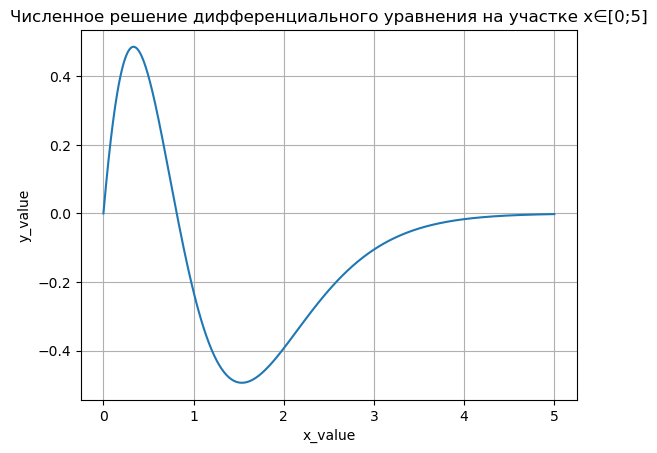

In [11]:
plt.plot(x, y)
plt.xlabel("x_value")
plt.ylabel("y_value")
plt.title("Численное решение дифференциального уравнения на участке x∈[0;5]")
plt.grid(True)
plt.show()

#### Автоматизированная программая функция для решения обыкновенного дифференциального уравнения 5й степени

In [51]:
# задаем (или запрашиваем с клавиатуры) некоторые начальные данные
equation_coefficients = [15, 90, 270, 405, 243] # коэффициенты при переменных
x0, y0, dy0, d2y0, d3y0, d4y0 = 0, 0, 3, -9, -8, 0 # начальные условия, данные в задаче
h = 0.001 # шаг итераций
x_start, x_end = 0, 5 # границы интервала

In [52]:
def f(y, dy, d2y, d3y, d4y):
    """Функция, решающая правую часть дифференциального уравнения 5й степени"""
    global equation_coefficients
    
    # определяем форму дифференциального уравнения 5й степени на основе исходнных данных
    function = -equation_coefficients[0] * d4y - equation_coefficients[1] * d3y - equation_coefficients[2] * d2y - equation_coefficients[3] * dy - equation_coefficients[4] * y
    
    return function

def solution_equation(x0, y0, dy0, d2y0, d3y0, d4y0, h, x_start, x_end):
    """Функция-решатель дифференциального уравнения"""
    
    # подгружаем бибилотеки
    import numpy as np # для работы с матрицами и массивами
    import matplotlib.pyplot as plt # для работы с визуализациями
    import pandas as pd # для работы с таблицами

    # определим количество шагов на заданном интервале
    num_steps = int((x_end - x_start) / h) + 1

    # развернем одномерные нулевые массивы данных для будущего заполнения их результатами расчетов
    x = np.zeros(num_steps)
    y = np.zeros(num_steps)
    dy = np.zeros(num_steps)
    d2y = np.zeros(num_steps)
    d3y = np.zeros(num_steps)
    d4y = np.zeros(num_steps)

    # заменим первые элементы массивов начальными условиями из дано
    x[0] = x0
    y[0] = y0
    dy[0] = dy0
    d2y[0] = d2y0
    d3y[0] = d3y0
    d4y[0] = d4y0

    # запускаем решающий цкил на основе прямой численной схемы
    for i in range(1, num_steps):
        # определяем целевые на данном шаге
        x[i] = x[i - 1] + h
        y[i] = y[i - 1] + h * dy[i - 1]

        # обновляем переменные для следующего шага
        dy[i] = dy[i - 1] + h * d2y[i - 1]
        d2y[i] = d2y[i - 1] + h * d3y[i - 1]
        d3y[i] = d3y[i - 1] + h * d4y[i - 1]
        d4y[i] = d4y[i - 1] + h * f(y[i - 1], dy[i - 1], d2y[i - 1], d3y[i - 1], d4y[i - 1])

    # строим график на указанном участке
    plt.plot(x, y)
    plt.xlabel("x_value")
    plt.ylabel("y_value")
    plt.title(f"Численное решение задачи дифференциального уравнения x∈[{x_start};{x_end}]")
    plt.grid(True)
    plt.show()
    
    # определяем данные в хранилище на основе пандасовского датафрейма
    df_solution = pd.DataFrame({"itertation" : range(0, num_steps),
                         "x_value" : x,
                         "y_value" : y})
    
    return df_solution

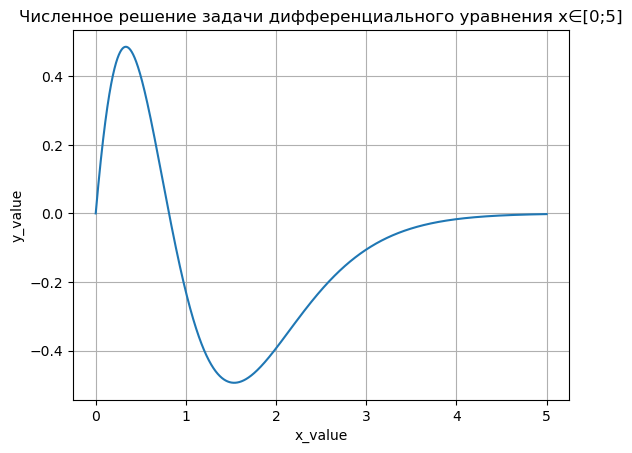

,itertation,x_value,y_value
0,0,0.000,0.000000
1,1,0.001,0.003000
2,2,0.002,0.005991
3,3,0.003,0.008973
4,4,0.004,0.011946
...,...,...,...
4996,4996,4.996,-0.002061
4997,4997,4.997,-0.002057
4998,4998,4.998,-0.002052
4999,4999,4.999,-0.002048


In [53]:
# исполняем функцию для решения уравнения
solution_equation(x0, y0, dy0, d2y0, d3y0, d4y0, h, x_start, x_end)

#### Выводы и обоснования

Как было описано выше, прямая численная схема обладает хорошей точностью при правильно подобранном шаге итерирования. Данным параметром достаточно легко управлять при подборе удовлетворительной точности и он интуитивно понятен, решение не занимает много времени и памяти процессора, что позволяет легко работать с данной схемой. Однако все индивидуально, а мой выбор обоснован лишь на подборе более схемы для данного конкретного уравнения и наличия расчетных мощностей на личном ПК. Однако, даже при таком раскладе событий, судя по плавному графику без переломов можно сказать, что данная схема с данным шагом хорошо подходит для решения данного уравнения. Идеальным было бы свериться с аналитическим решением, если таковое имеется, либо свериться с результатами других схемам.